In [21]:
from pathlib import Path
import plotly.express as px
import plotly.graph_objects as go
from typing import Dict, List, Tuple
import torch

In [6]:
import sys
import os

app = "/app"
if app not in sys.path:
    sys.path.append(app)

In [7]:
from src.comparator import Comparator
from src.embed import Embedder
from src.preprint import Preprint
from src.review_process import ReviewProcess
from src.config import config

In [8]:
embedder = Embedder(model=config.embedding_model)

In [9]:
doi = "10.1101/2021.05.12.443743"

In [10]:
preprint = Preprint(doi=doi)

In [11]:
review_process = ReviewProcess(doi=doi)

In [12]:
preprint_paragraphs = preprint.get_section_paragraphs("results")

In [13]:
review_paragraphs = review_process.reviews[0].get_paragraphs()

In [14]:
review_paragraphs

['**Note:** This preprint has been reviewed by subject experts for *Review Commons*. Content has not been altered except for formatting.',
 "In this manuscript, Mishima et al., designed a reporter system (dubbed PACE, for Parallel Analysis of Codon Effects) to assess the effect of codon usage in regulating mRNA stability in a controlled sequence context. This reporter corresponds to a stretch of 20 repetitions of a given codon (to be tested for its effect on mRNA stability), each repetition being separated by one codon corresponding to each of the 20 canonical amino acids. This stretch is inserted at the 3\\' end of the coding sequence of a superfolder GFP flanked with fixed 5\\' and 3\\' untranslated regions. In vitro transcribed capped and polyadenylated RNAs are then produced from these reporters (each with a specific stretch of repetitions of a given codon), pooled together and injected into zebrafish zygotes to monitor their relative abundance at different time points upon injecti

In [15]:
comp = Comparator(embedder)

In [16]:
similarity_matrix = comp.compare_dot(preprint_paragraphs, review_paragraphs)

In [17]:
similarity_matrix.size()

torch.Size([22, 17])

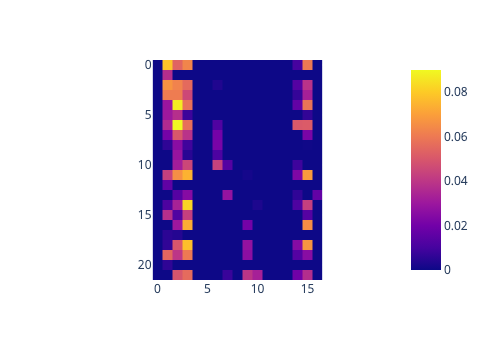

In [25]:
fig = px.imshow(
    torch.clamp(similarity_matrix - 0.8, 0, 1)
)
fig.show()

In [15]:
for i, p in enumerate(preprint_paragraphs):
    print(i, p[:80])

0 We designed an artificial codon-tag sequence to analyze the codon effects on mRN
1 (A) A scheme of the codon-tag reporter system. A codon to be tested (pink, in th
2 Having validated the codon-tag reporter system with the two Leu codons, we const
3 (A) Scheme of parallel analysis of codon effects (PACE). Codon tag reporter mRNA
4 Several lines of evidence indicated that PACE was a valid approach for the analy
5 (A) A scatter plot showing the reproducibility of the codon effects measured by 
6 Using CSC and tRNA sequencing, Bazzini et al. showed that nonoptimal codons tend
7 Next, we asked if the codon effects measured by PACE correlated with the ribosom
8 (A) Distribution of the ribosome footprint lengths derived from codon-tag sequen
9 (A) Scheme of ribosome footprint analysis using PACE reporter mRNAs. An example 
10 We first analyzed a correlation between the codon effects measured by PACE and t
11 Next, we modulated tRNA availability in zebrafish embryos to experimentally vali
12

In [16]:
for i, p in enumerate(review_paragraphs):
    print(i, p[:80])

0 **Note:** This preprint has been reviewed by subject experts for *Review Commons
1 In this manuscript, Mishima et al., designed a reporter system (dubbed PACE, for
2 Using the PACE reporter, the authors were able to obtain a quantitative estimati
3 Having validated their PACE protocol, the authors performed ribosome profiling t
4 Overall, the manuscript is very well written and pleasant to read. The introduct
5 Below you will find some major and minor points that, in my opinion, should be a
6 - One interesting aspect of the PACE reporter assay is the possibility to monito
7 Indeed, ribosome dwell times (in yeast and mammals) have been shown to respond b
8 If the authors performed RNA-seq together with the ribosome profiling experiment
9 - Figure 6: Insertion of the Lys x8 AAA stretch in the tandem ORF reporter leads
10 On a similar note, how do the authors explain the decrease in signal of the Flag
11 - The color-coded CSC results from 'Bazzini et al., 2016' presented at the botto
12